# Imports

In [7]:
import csv

import numpy as np
import pandas as pd
import scipy.signal
import astropy.stats

#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
%matplotlib inline

# Constants

##### J1311 coords

PSR J1311-3430 -- Pulsar
Other object types:	gam (3EG,0FGL,...), Psr (PSR)
ICRS coord. (ep=J2000) :	13 11 50.2 -34 30 07 (Gamma-ray) [ 79200 79200 -20 ] E 2015ApJS..218...23A

[source](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=PSR%20J1311-34300)

In [8]:
# Physical constants
pi = 3.14159

In [9]:
# Plot text sizes
title_size = 24
axislabel_size = 22
axistick_size = 20

# File I/O
- J1311 part 1 had an additional 'E' inserted into one line that had to be removed

##### Get file paths

In [10]:
file_directory = './data/J1311_photons/'
file_names = ['J1311_phase_part'+str(i)+'.txt' for i in range(1,6)]
print file_names
file_paths = [file_directory + file_name for file_name in file_names]
for file_path in file_paths:
    print file_path

['J1311_phase_part1.txt', 'J1311_phase_part2.txt', 'J1311_phase_part3.txt', 'J1311_phase_part4.txt', 'J1311_phase_part5.txt']
./data/J1311_photons/J1311_phase_part1.txt
./data/J1311_photons/J1311_phase_part2.txt
./data/J1311_photons/J1311_phase_part3.txt
./data/J1311_photons/J1311_phase_part4.txt
./data/J1311_photons/J1311_phase_part5.txt


##### Load data into pandas df's

In [11]:
# Adjust the header to be pandas conformant
fh = open(file_paths[0])
header = ' '.join(fh.read().split('\n')[0].split()).split(' ')
header = [ele.replace('_', ' ') for ele in header]
print header
fh.close()

['ENERGY', 'RA', 'DEC', 'L', 'B', 'THETA', 'PHI', 'TIME', 'EVENT ID', 'PULSE PHASE']


In [12]:
df = pd.read_csv(file_paths[0], skiprows = [0], delimiter = ' ', header = None, names = header)

# Pre-processing and data exploration

In [13]:
print len(df)

3036117


In [14]:
df.head()

,ENERGY,RA,DEC,L,B,THETA,PHI,TIME,EVENT ID,PULSE PHASE
0,117.8400,179.9646,-33.81308,290.8282,27.84342,58.71832,276.24650,2.396096e+08,5314571,0.652637
1,166.4942,179.7794,-36.94781,291.4443,24.75403,17.06174,297.73740,2.396105e+08,7254183,0.695484
2,1414.6280,179.9501,-35.99692,291.3597,25.71173,71.29970,349.51040,2.396118e+08,11024151,0.081871
3,12019.3700,179.7933,-35.63216,291.1318,26.03909,53.59599,75.80354,2.396165e+08,8917657,0.553284
4,176.3304,179.8074,-34.66773,290.9022,26.98145,53.96607,273.46490,2.396555e+08,7993506,0.290104


In [15]:
df.describe()

,ENERGY,RA,DEC,L,B,THETA,PHI,TIME,EVENT ID,PULSE PHASE
count,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06,3.036117e+06
mean,4.577849e+02,1.980745e+02,-3.672175e+01,3.075376e+02,2.536689e+01,5.544023e+01,1.541910e+02,2.730450e+08,7.433996e+06,4.997797e-01
std,2.385240e+03,9.292467e+00,6.910997e+00,8.317897e+00,6.869596e+00,1.791595e+01,1.140567e+02,1.305799e+07,3.923373e+06,2.888203e-01
min,1.000002e+02,1.796602e+02,-4.948215e+01,2.906225e+02,1.320109e+01,4.602647e-02,1.244711e-04,2.395596e+08,9.740000e+02,0.000000e+00
25%,1.491545e+02,1.905298e+02,-4.211773e+01,3.008781e+02,1.998093e+01,4.197442e+01,5.434690e+01,2.653283e+08,4.718928e+06,2.495914e-01
50%,2.275397e+02,1.981240e+02,-3.755651e+01,3.075397e+02,2.439697e+01,6.347301e+01,1.346877e+02,2.751721e+08,7.612582e+06,4.996328e-01
75%,4.067823e+02,2.056478e+02,-3.183432e+01,3.141646e+02,3.010335e+01,6.850214e+01,2.635124e+02,2.835866e+08,1.016000e+07,7.498941e-01
max,2.991870e+05,2.162571e+02,-1.948332e+01,3.247774e+02,4.319901e+01,8.410781e+01,3.600000e+02,2.905634e+08,1.790765e+07,9.999995e-01


0 0 0
1 0 1
2 0 2
3 0 3
4 1 0
5 1 1
6 1 2
7 1 3
8 2 0
9 2 1


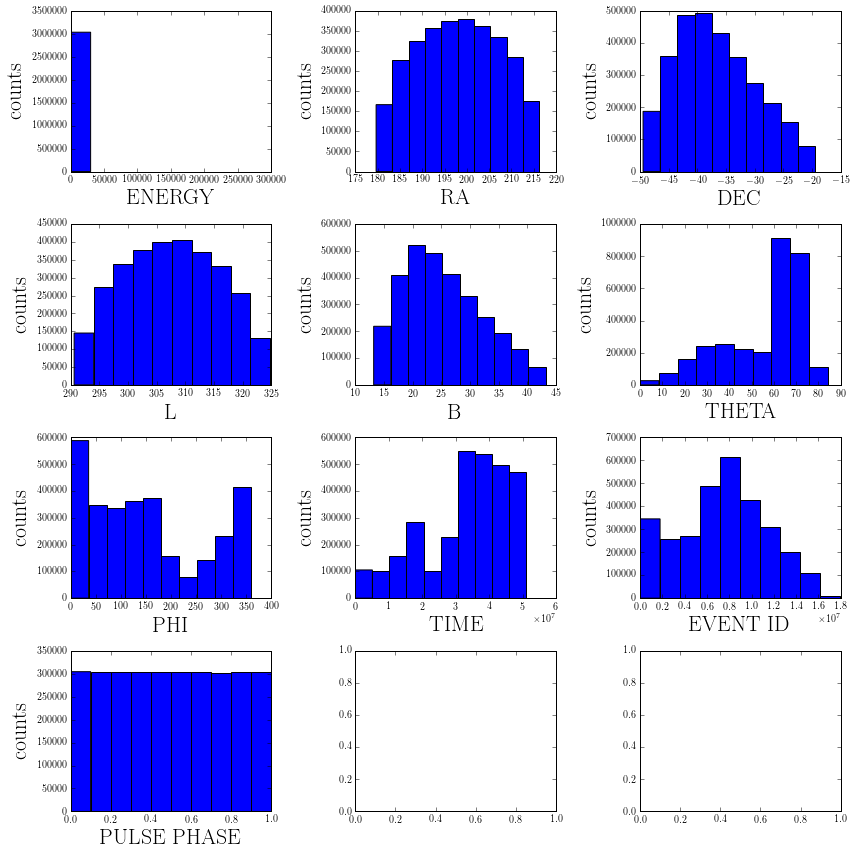

In [34]:
fig, axes = plt.subplots(4, 3, figsize = (12,12))

for i, column in enumerate(df.columns):
    plt.sca(axes[i/3, i%3])
    plt.hist(df[column].values)
    
    plt.xlabel(column, size = axislabel_size)
    plt.ylabel('counts', size = axislabel_size)
fig.tight_layout()
plt.show()

### Pulse phase is constant but should be periodic with pulsar spin... try plotting counts vs. position

In [35]:
# Get the image matrix
ra = df['RA'].values
dec = df['DEC'].values

ra_bins = np.linspace(np.min(ra), np.max(ra), 1024)

dec_bins = np.linspace(np.min(dec), np.max(dec), 1024)

ra_binned = np.digitize(ra, ra_bins) - 1
dec_binned = np.digitize(dec, dec_bins) - 1

dec_ra_matrix = np.zeros((dec_bins.shape[0], ra_bins.shape[0]))

for i in range(len(df)):
    dec_ra_matrix[dec_binned[i], ra_binned[i]] += 1

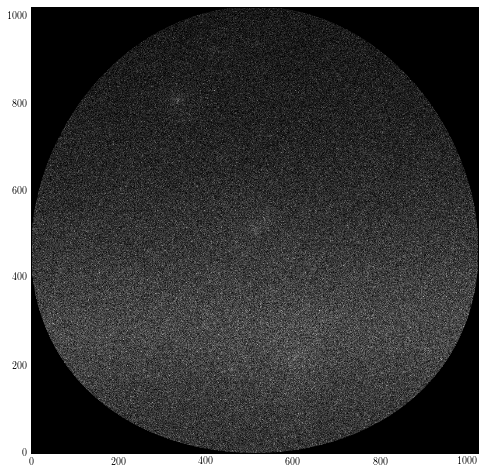

In [39]:
fig = plt.figure(figsize = (8,8))
plt.imshow(dec_ra_matrix, origin = 'lower', cmap = 'gray')
plt.show()

### Remove all photons outside of elliptical region of interest (ROI)

##### Create the ROI

In [61]:
# Define the ROI ellipse
ra_center = (df['RA'].max() + df['RA'].min())/2.
dec_center = (df['DEC'].max() + df['DEC'].min())/2. 
a = 2.
b = 2.

# Digitize the roi 
thetas = np.linspace(0, 2*pi, 100)
ras = np.digitize(ra_center + a*np.cos(thetas), ra_bins)
decs = np.digitize(dec_center + b*np.sin(thetas), dec_bins)

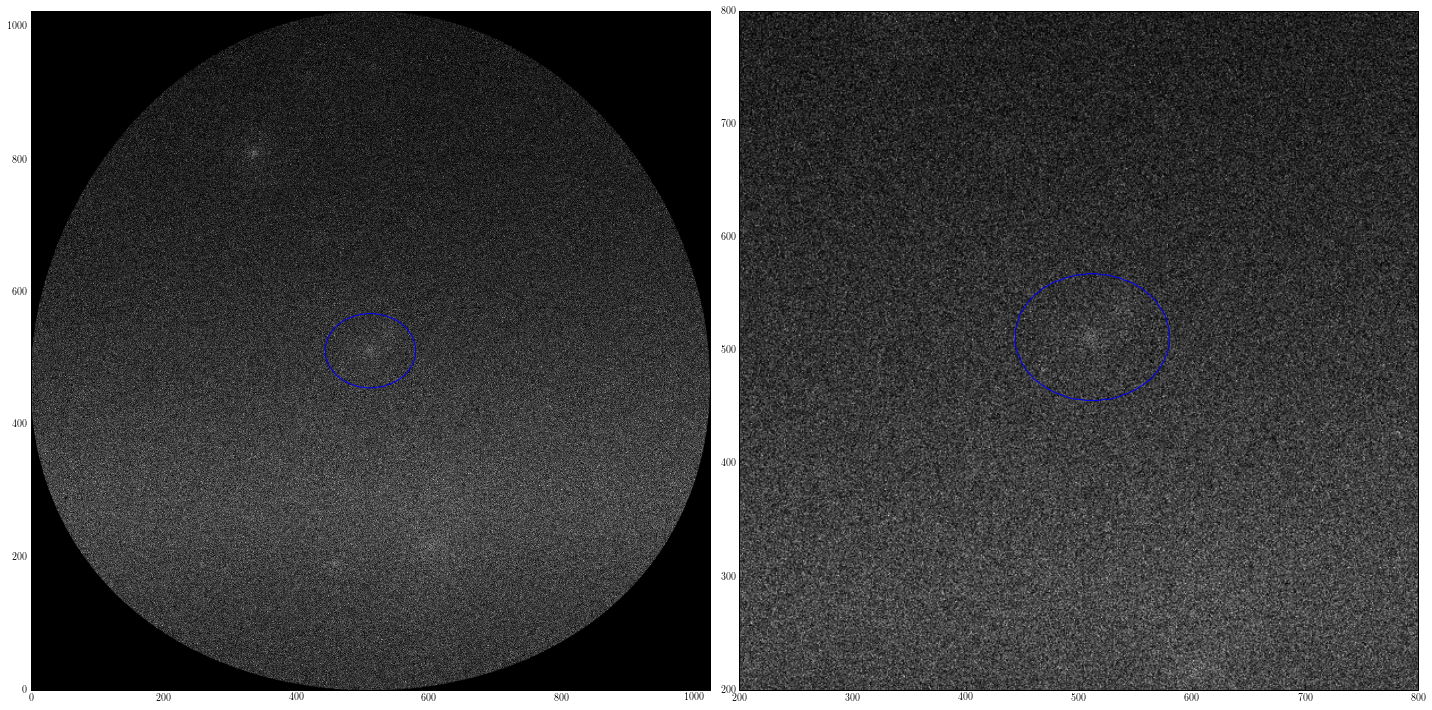

In [62]:
# Plot matrix and ROI ellipse
fig, ax = plt.subplots(1, 2, figsize = (20,10))

fig.sca(ax[0])
plt.imshow(dec_ra_matrix, cmap = 'gray', origin = 'lower left')
plt.plot(decs, ras)

plt.xlim(0, dec_ra_matrix.shape[0])
plt.ylim(0, dec_ra_matrix.shape[0])



fig.sca(ax[1])
plt.imshow(dec_ra_matrix, cmap = 'gray', origin = 'lower left')
plt.plot(decs, ras)


plt.xlim(200,800)
plt.ylim(200,800)

fig.tight_layout()

plt.show()

##### Remove the photons

In [63]:
mod_df = df[df['RA'].map(lambda x: (x-ra_center)**2.)/a**2.+df['DEC'].map(lambda y: (y-dec_center)**2.)/b**2. <= 1]

In [64]:
print len(mod_df)

49045


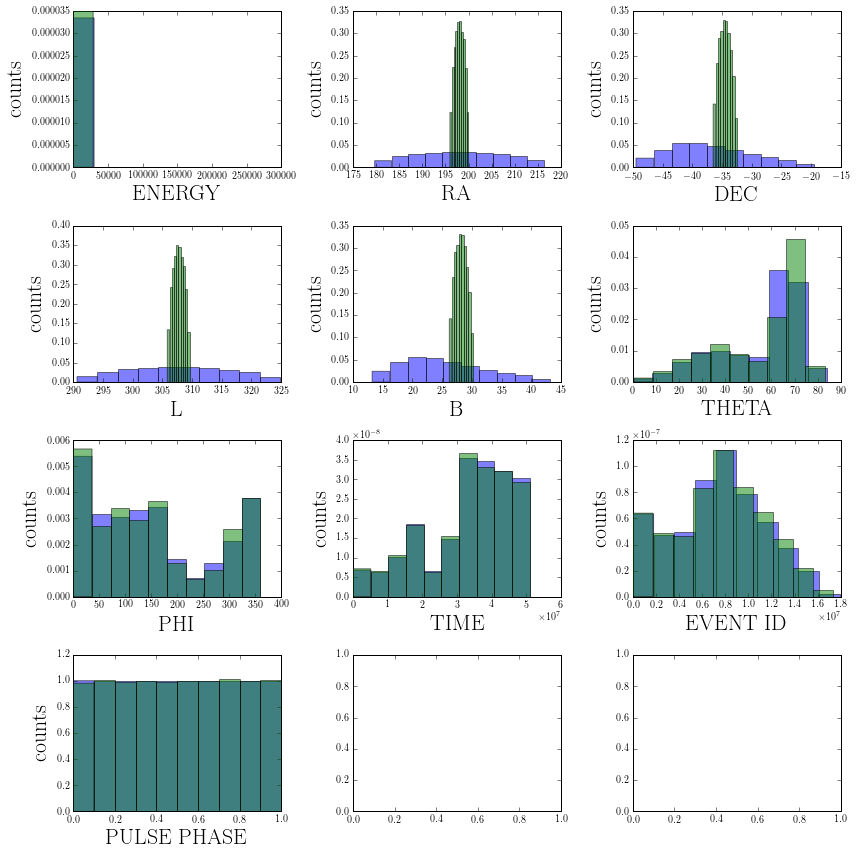

In [65]:
fig, axes = plt.subplots(4, 3, figsize = (12,12))

for i, column in enumerate(df.columns):
    plt.sca(axes[i/3, i%3])
    plt.hist(df[column].values, normed = True, alpha = 0.5)
    plt.hist(mod_df[column].values, normed = True, zorder = 3, alpha = 0.5)
    
    plt.xlabel(column, size = axislabel_size)
    plt.ylabel('counts', size = axislabel_size)
fig.tight_layout()
plt.show()

### Try other regions

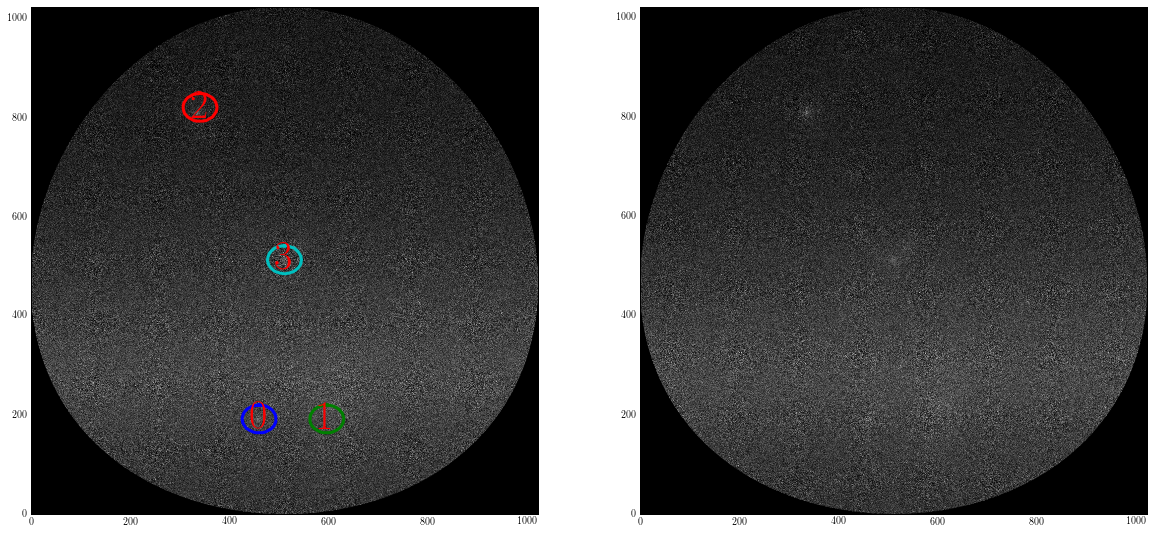

In [118]:
# Define the ROI ellipses
ra_center = [186.5, 186.5, 209, 198]
dec_center = [-36, -32, -39.5, -34.5]

a = 1
b = 1

# Digitize the rois 
thetas = np.linspace(0, 2*pi, 100)
ras = [np.digitize(ra_center[i] + a*np.cos(thetas), ra_bins) for i in range(len(ra_center))]
decs = [np.digitize(dec_center[i] + b*np.sin(thetas), dec_bins) for i in range(len(dec_center))]




fig, axes = plt.subplots(1, 2, figsize = (20,10))
plt.sca(axes[0])
plt.imshow(dec_ra_matrix, origin = 'lower left', cmap = 'gray')
for i in range(len(ra_center)):
    #plt.scatter(np.digitize(dec_center[i], dec_bins), np.digitize(ra_center[i], ra_bins), s = 100, marker = 'x')
    plt.text(np.digitize(dec_center[i], dec_bins), np.digitize(ra_center[i], ra_bins), str(i), ha = 'center', va = 'center', size = 40, color = 'red')
    plt.plot(decs[i], ras[i], lw = 3)
plt.xlim(0, dec_ra_matrix.shape[1])
plt.ylim(0, dec_ra_matrix.shape[0])
    
plt.sca(axes[1])
plt.imshow(dec_ra_matrix, origin = 'lower left', cmap = 'gray')

plt.show()

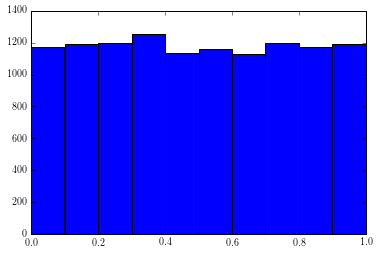

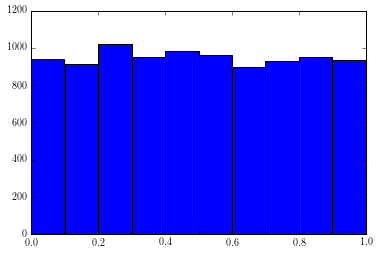

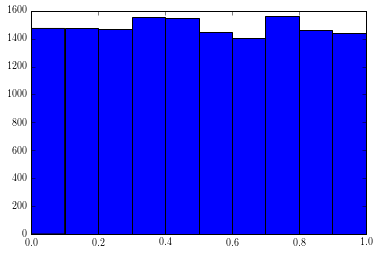

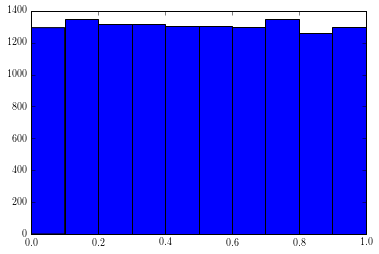

In [113]:
for i in range(len(ra_center)):
    mod_df = df[df['RA'].map(lambda x: (x-ra_center[i])**2.)/a**2.+df['DEC'].map(lambda y: (y-dec_center[i])**2.)/b**2. <= 1]
    plt.hist(mod_df['PULSE PHASE'])
    plt.show()